In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
from test_class import testSVR
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import pickle

sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

In [3]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Gradient Phase')
train, val, test = data.split_data('Gradient Phase')


0        -0.049881
1        -0.037877
2        -0.026438
3        -0.016091
4        -0.007256
            ...   
599995   -0.122759
599996   -0.131433
599997   -0.140539
599998   -0.149889
599999   -0.159250
Name: Gradient Phase, Length: 600000, dtype: float64
0        -0.049881
1        -0.037877
2        -0.026438
3        -0.016091
4        -0.007256
            ...   
599995   -0.122759
599996   -0.131433
599997   -0.140539
599998   -0.149889
599999   -0.159250
Name: Gradient Phase, Length: 600000, dtype: float64
0        -0.049881
1        -0.037877
2        -0.026438
3        -0.016091
4        -0.007256
            ...   
599995   -0.122759
599996   -0.131433
599997   -0.140539
599998   -0.149889
599999   -0.159250
Name: Gradient Phase, Length: 600000, dtype: float64
0        -0.049881
1        -0.037877
2        -0.026438
3        -0.016091
4        -0.007256
            ...   
599995   -0.122759
599996   -0.131433
599997   -0.140539
599998   -0.149889
599999   -0.159250
Name:

In [4]:
amplitude = data.data['Gradient Phase']
defectos = data.defectos_set()

In [5]:
filename = 'SVRFase_model.sav'
model = pickle.load(open(filename, 'rb'))


## **50 steps**

In [6]:
steps = 50
x_test, y_test = ut2.defectos_set(defectos, amplitude, 50)


In [7]:
test50 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test50_MLP_defectos.csv", test50, delimiter=",")

  0%|          | 0/95 [00:00<?, ?it/s]

100%|██████████| 95/95 [00:02<00:00, 46.11it/s]


In [8]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.199214087574571
Mean Absolute Percentage Error: 204.898845401146
R2 Score: -5767.719227968951
Root Mean Squared Error: 0.4455312508306236


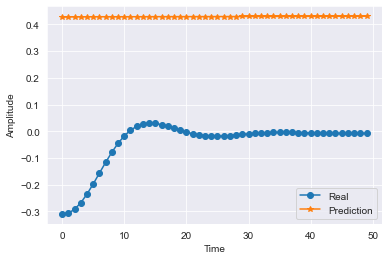

In [9]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **100 steps**

In [10]:
steps = 100
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [11]:
test100 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test100_MLP_defectos.csv", test100, delimiter=",")

100%|██████████| 95/95 [00:03<00:00, 24.35it/s]


In [12]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.19433714265876495
Mean Absolute Percentage Error: 274.8709773830307
R2 Score: -4544.112130301766
Root Mean Squared Error: 0.44040032830819803


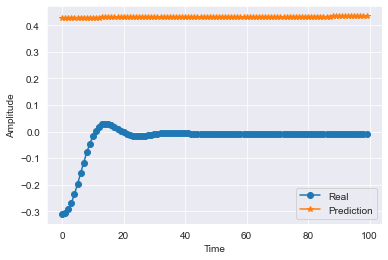

In [13]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **500 steps**

In [14]:
steps = 500
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [15]:
test500 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test500_MLP_defectos.csv", test500, delimiter=",")

100%|██████████| 95/95 [00:19<00:00,  4.93it/s]


In [16]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.20524701660449607
Mean Absolute Percentage Error: 310.55976164587435
R2 Score: -1167.8562748966317
Root Mean Squared Error: 0.45268738783895845


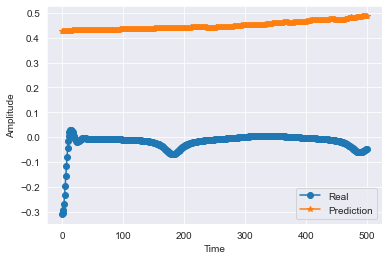

In [17]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **1000 steps**

In [18]:
steps = 1000
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [19]:
test1000 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test1000_MLP_defectos.csv", test1000, delimiter=",")

100%|██████████| 95/95 [00:40<00:00,  2.33it/s]


In [20]:
mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.24630402868471676
Mean Absolute Percentage Error: 327.78987893748507
R2 Score: -806.7705483079292
Root Mean Squared Error: 0.4938226539333211


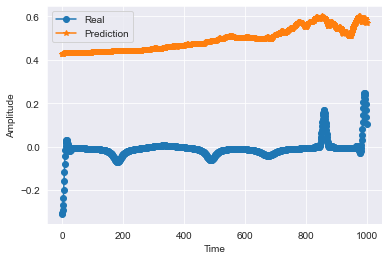

In [21]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test1000[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()